In [1]:
import sys

sys.path.append("../")

Zadanie polega na przeprowadzeniu symulacji Monte Carlo w celu oszacowania parametrów regresji liniowej $ B_0 $ (wyraz wolny) i $ B_1 $ (współczynnik kierunkowy) przy użyciu próbek danych z losowym szumem. Celem jest porównanie wyników uzyskanych z metody najmniejszych kwadratów z teoretycznymi rozkładami normalnymi tych estymatorów.

### Aspekt teoretyczny:
Regresja liniowa jest podstawową metodą statystyczną, której celem jest modelowanie zależności między zmienną zależną $ y $ a zmienną niezależną $ x $ w postaci funkcji liniowej:
$$
y = B_0 + B_1 x + \epsilon
$$
gdzie:
- $ B_0 $ to wyraz wolny (intercept),
- $ B_1 $ to współczynnik kierunkowy (slope),
- $ \epsilon $ to błąd losowy, który jest założony do bycia zmienną losową z rozkładem normalnym o zerowej średniej i stałej wariancji $ \sigma^2 $.

### Estymatory parametrów regresji:
Parametry regresji $ B_0 $ i $ B_1 $ są estymowane za pomocą metody najmniejszych kwadratów. Wzory na estymatory parametrów to:
$$
B_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$
$$
B_0 = \bar{y} - B_1 \bar{x}
$$
gdzie:
- $ \bar{x} $ to średnia z wartości zmiennej $ x $,
- $ \bar{y} $ to średnia z wartości zmiennej $ y $.

W ramach zadania, dla każdej symulacji losowo generowane są wartości zmiennej zależnej $ y $ na podstawie założonej funkcji liniowej, z dodatkowym losowym błędem $ \epsilon $, który ma rozkład normalny $ N(0, \sigma^2) $. Po uzyskaniu oszacowań parametrów $ B_0 $ i $ B_1 $ dla każdej próbki, obliczane są średnie i wariancje tych estymatorów.

### Rozkład estymatorów:
Z teoretycznego punktu widzenia, dla dużych prób (zakładając, że $ x_i $ są dobrze rozproszone), estymatory $ B_0 $ i $ B_1 $ mają rozkład normalny:
$$
B_0 \sim N(B_0, \sigma^2 \left( \frac{1}{n} + \frac{\bar{x}^2}{\sum (x_i - \bar{x})^2} \right))
$$
$$
B_1 \sim N(B_1, \frac{\sigma^2}{\sum (x_i - \bar{x})^2})
$$
gdzie $ n $ to liczba obserwacji. Wartości teoretyczne dla średniej i wariancji estymatorów są porównywane z wartościami uzyskanymi w wyniku symulacji.

### Wyniki:
W zadaniu analizowane są wyniki empiryczne uzyskane z symulacji Monte Carlo oraz porównanie ich z teoretycznymi rozkładami normalnymi dla $ B_0 $ i $ B_1 $. Oczekiwanym celem jest ocena jakości estymacji parametrów regresji, a także badanie, jak dobrze estymatory te odpowiadają rozkładom normalnym, które są spodziewane w przypadku danych z losowym błędem.



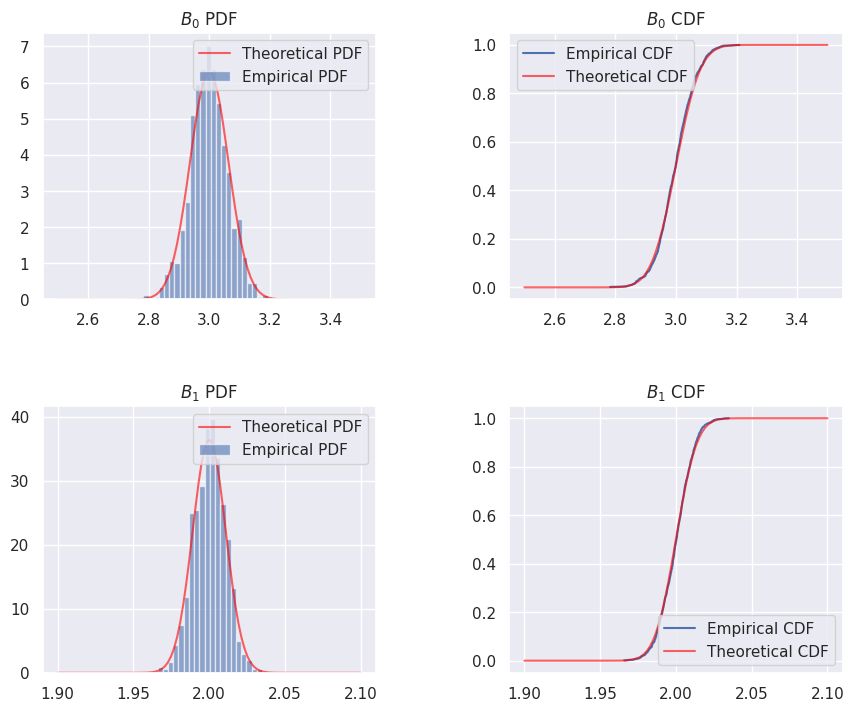

B_0 Empirical Mean: 2.99864
B_0 Theoretical Mean: 3.00000
B_0 Empirical Variance: 0.00373
B_0 Theoretical Variance: 0.00399


B_1 Empirical Mean: 2.00012
B_1 Theoretical Mean: 2.00000
B_1 Empirical Variance: 0.00011
B_1 Theoretical Variance: 0.00012


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF
from src.functions import (
    generate_dependent_variable,
    estimate_coefficients,
    calculate_theoretical_distributions,
)

# Set Seaborn style
sns.set()

# Parameters
b0_true = 3
b1_true = 2
sigma = 1
n_samples = 1000
n_simulations = 1000

# Arrays to store simulation results
b0_estimates = np.zeros(n_simulations)
b1_estimates = np.zeros(n_simulations)

# Generate independent variable
x_values = np.linspace(0, 10, n_samples)

# Monte Carlo simulations
for i in range(n_simulations):
    y_values = generate_dependent_variable(x_values, b0_true, b1_true, sigma)
    b0_estimate, b1_estimate = estimate_coefficients(x_values, y_values)
    b0_estimates[i] = b0_estimate
    b1_estimates[i] = b1_estimate


# Theoretical distributions
b0_theoretical, b1_theoretical = calculate_theoretical_distributions(
    b0_true, b1_true, sigma, x_values, n_samples
)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot B0 PDF
axs[0, 0].plot(
    np.linspace(2.5, 3.5, 100),
    b0_theoretical.pdf(np.linspace(2.5, 3.5, 100)),
    color="red",
    alpha=0.6,
    label="Theoretical PDF",
)
axs[0, 0].hist(b0_estimates, bins=25, density=True, alpha=0.6, label="Empirical PDF")
axs[0, 0].set_title("$B_0$ PDF")
axs[0, 0].legend()

# Plot B0 CDF
ecdf_b0 = ECDF(b0_estimates)
axs[0, 1].plot(ecdf_b0.x, ecdf_b0.y, label="Empirical CDF")
axs[0, 1].plot(
    np.linspace(2.5, 3.5, 100),
    b0_theoretical.cdf(np.linspace(2.5, 3.5, 100)),
    color="red",
    alpha=0.6,
    label="Theoretical CDF",
)
axs[0, 1].set_title("$B_0$ CDF")
axs[0, 1].legend()

# Plot B1 PDF
axs[1, 0].plot(
    np.linspace(1.9, 2.1, 100),
    b1_theoretical.pdf(np.linspace(1.9, 2.1, 100)),
    color="red",
    alpha=0.6,
    label="Theoretical PDF",
)
axs[1, 0].hist(b1_estimates, bins=20, density=True, alpha=0.6, label="Empirical PDF")
axs[1, 0].set_title("$B_1$ PDF")
axs[1, 0].legend()

# Plot B1 CDF
ecdf_b1 = ECDF(b1_estimates)
axs[1, 1].plot(ecdf_b1.x, ecdf_b1.y, label="Empirical CDF")
axs[1, 1].plot(
    np.linspace(1.9, 2.1, 100),
    b1_theoretical.cdf(np.linspace(1.9, 2.1, 100)),
    color="red",
    alpha=0.6,
    label="Theoretical CDF",
)
axs[1, 1].set_title("$B_1$ CDF")
axs[1, 1].legend()

# Adjust layout
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

# Print results
print(f"B_0 Empirical Mean: {np.mean(b0_estimates):.5f}")
print(f"B_0 Theoretical Mean: {b0_true:.5f}")
print(f"B_0 Empirical Variance: {np.var(b0_estimates):.5f}")
print(
    f"B_0 Theoretical Variance: {sigma**2 / n_samples + np.mean(x_values)**2 * sigma**2 / np.sum((x_values - np.mean(x_values))**2):.5f}"
)
print("\n")
print(f"B_1 Empirical Mean: {np.mean(b1_estimates):.5f}")
print(f"B_1 Theoretical Mean: {b1_true:.5f}")
print(f"B_1 Empirical Variance: {np.var(b1_estimates):.5f}")
print(
    f"B_1 Theoretical Variance: {sigma**2 / np.sum((x_values - np.mean(x_values))**2):.5f}"
)

### Opis zadania:

Celem zadania jest przeprowadzenie symulacji Monte Carlo w celu oszacowania t-statystyk dla współczynników regresji liniowej $ B_0 $ (wyraz wolny) oraz $ B_1 $ (współczynnik kierunkowy) w modelu regresji liniowej. Symulacja polega na generowaniu danych przy założeniu znanych wartości tych współczynników oraz szumów losowych, a następnie obliczeniu t-statystyk oraz porównaniu ich rozkładów empirycznych z rozkładami teoretycznymi t-Studenta.

### Teoria:

Model regresji liniowej opisuje zależność między zmiennymi $ x $ i $ y $ za pomocą równania:
$$
y = B_0 + B_1 x + \epsilon
$$
gdzie:
- $ y $ to zmienna zależna,
- $ x $ to zmienna niezależna,
- $ B_0 $ to wyraz wolny (intercept),
- $ B_1 $ to współczynnik kierunkowy (slope),
- $ \epsilon $ to błąd losowy, który jest założony do bycia zmienną losową o rozkładzie normalnym z zerową średnią i stałą wariancją $ \sigma^2 $.

Po oszacowaniu parametrów $ B_0 $ i $ B_1 $ za pomocą metody najmniejszych kwadratów (OLS), obliczane są t-statystyki, które mierzą, jak bardzo oszacowane wartości współczynników różnią się od ich prawdziwych wartości. T-statystyki dla $ B_0 $ i $ B_1 $ oblicza się ze wzoru:
$$
t(B_1) = \frac{B_1 - B_{1, true}}{\sqrt{\frac{S^2}{\sum (x_i - \bar{x})^2}}}
$$
$$
t(B_0) = \frac{B_0 - B_{0, true}}{\sqrt{S^2 \left( \frac{1}{n} + \frac{\bar{x}^2}{\sum (x_i - \bar{x})^2} \right)}}
$$
gdzie:
- $ S^2 $ to oszacowanie wariancji reszt, obliczane jako:
  $$
  S^2 = \frac{1}{n - 2} \sum (y_i - \hat{y_i})^2
  $$
  gdzie $ \hat{y_i} $ to wartości oszacowane na podstawie modelu regresji,
- $ n $ to liczba obserwacji,
- $ \bar{x} $ to średnia wartość zmiennej niezależnej $ x $.

T-statystyki dla współczynników $ B_0 $ i $ B_1 $ mają rozkład t-Studenta o $ n - 2 $ stopniach swobody. Taki rozkład t-Studenta jest wykorzystywany do testowania hipotez o wartościach tych współczynników.

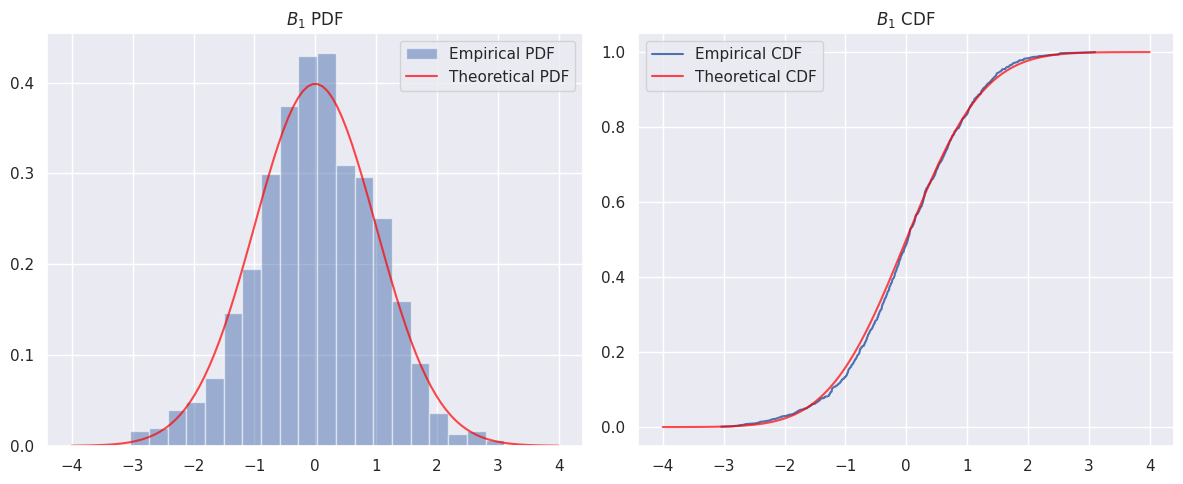

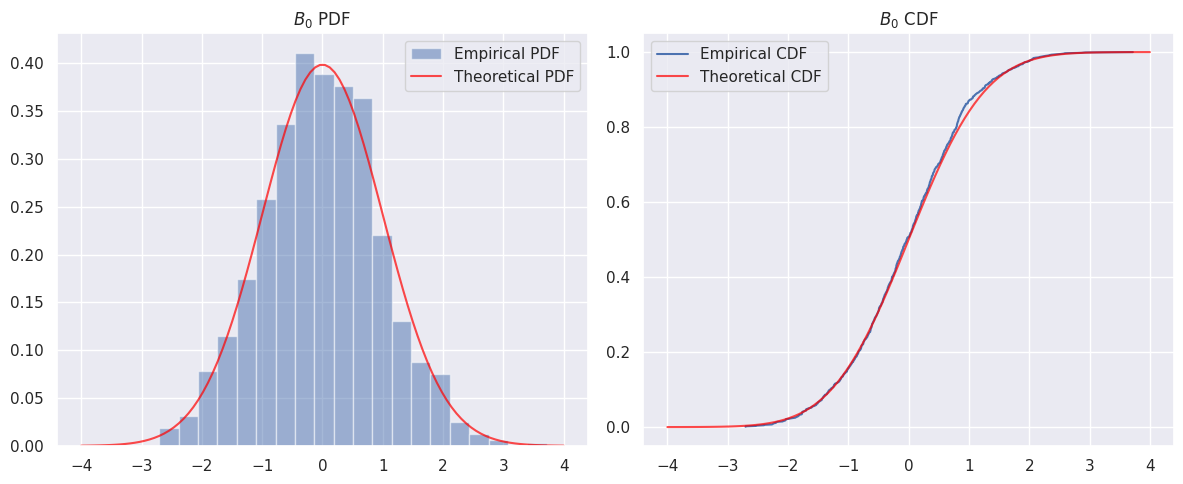

B_1 Empirical Mean: 0.02159
B_1 Theoretical Mean: 0
B_1 Empirical Variance: 0.95558
B_1 Theoretical Variance: 1.00201

B_0 Empirical Mean: -0.01835
B_0 Theoretical Mean: 0
B_0 Empirical Variance: 0.94716
B_0 Theoretical Variance: 1.00201


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t as t_student
from statsmodels.distributions.empirical_distribution import ECDF
from src.functions import (
    generate_simulation_data,
    calculate_t_statistics,
    plot_distributions,
)

# Set Seaborn style
sns.set(style="darkgrid")

# Parameters
b0 = 3
b1 = 2
sigma = 1
n = 1000
mcs = 1000

# Generate independent variable
x_values = np.linspace(1, 100, n)

# Generate simulation data
b0_estimates, b1_estimates, residual_variances = generate_simulation_data(
    x_values, b0, b1, sigma, n, mcs
)

# Calculate t-statistics
t_b1 = calculate_t_statistics(b1_estimates, b1, residual_variances, x_values, n, "b1")
t_b0 = calculate_t_statistics(b0_estimates, b0, residual_variances, x_values, n, "b0")

# Theoretical t-distribution
theoretical_t = t_student(df=n - 2)

# Plot distributions
plot_distributions(t_b1, theoretical_t, "$B_1$")
plot_distributions(t_b0, theoretical_t, "$B_0$")

# Print results
print(f"B_1 Empirical Mean: {np.mean(t_b1):.5f}")
print("B_1 Theoretical Mean: 0")
print(f"B_1 Empirical Variance: {np.var(t_b1):.5f}")
print(f"B_1 Theoretical Variance: {(n - 2) / (n - 4):.5f}\n")

print(f"B_0 Empirical Mean: {np.mean(t_b0):.5f}")
print("B_0 Theoretical Mean: 0")
print(f"B_0 Empirical Variance: {np.var(t_b0):.5f}")
print(f"B_0 Theoretical Variance: {(n - 2) / (n - 4):.5f}")

### Opis zadania:

Celem zadania jest przeprowadzenie symulacji Monte Carlo w celu oceny pokrycia przedziałów ufności dla współczynników regresji liniowej $ B_0 $ (wyraz wolny) oraz $ B_1 $ (współczynnik kierunkowy). Przeprowadza się symulacje z różnymi wariantami estymacji błędów (znanymi oraz oszacowanymi) i porównuje się, jak często prawdziwe wartości współczynników mieszczą się w tych przedziałach ufności. Istnieją dwie metody obliczania przedziałów ufności: przy założeniu znanej wariancji błędu oraz przy oszacowaniu tej wariancji na podstawie reszt.

### Teoria:

#### Model regresji liniowej:
Model regresji liniowej opisuje zależność między zmienną zależną $ y $ a zmienną niezależną $ x $ za pomocą równania:
$$
y = B_0 + B_1 x + \epsilon
$$
gdzie:
- $ B_0 $ to wyraz wolny (intercept),
- $ B_1 $ to współczynnik kierunkowy (slope),
- $ \epsilon $ to błąd losowy, który ma rozkład normalny $ \epsilon \sim N(0, \sigma^2) $.

#### Estymacja współczynników:
Współczynniki $ B_0 $ i $ B_1 $ są estymowane za pomocą metody najmniejszych kwadratów (OLS). Zgodnie z tą metodą, współczynniki te są obliczane jako:
$$
B_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$
$$
B_0 = \bar{y} - B_1 \bar{x}
$$
gdzie $ \bar{x} $ i $ \bar{y} $ to średnie wartości zmiennych $ x $ i $ y $.

#### Obliczanie przedziałów ufności:
Przedziały ufności dla współczynników regresji są obliczane na podstawie estymowanych współczynników oraz ich błędów standardowych. Błąd standardowy dla współczynnika $ B_1 $ i $ B_0 $ jest obliczany w dwóch wariantach:
1. **Znaną wariancją $ \sigma^2 $**: Błąd standardowy dla $ B_1 $ i $ B_0 $ jest obliczany na podstawie znanej wartości wariancji błędów.
2. **Osobno oszacowaną wariancją reszt**: W przypadku braku znajomości wariancji, stosuje się estymator reszt, który jest obliczany jako:
$$
S^2 = \frac{1}{n-2} \sum (y_i - \hat{y}_i)^2
$$
gdzie $ \hat{y}_i $ to wartości przewidywane przez model.

#### Przedziały ufności:
Po obliczeniu błędów standardowych, przedziały ufności dla współczynników regresji są określane jako:
$$
B_1 \pm z_{\alpha/2} \cdot SE(B_1)
$$
$$
B_0 \pm z_{\alpha/2} \cdot SE(B_0)
$$
gdzie $ z_{\alpha/2} $ to wartość krytyczna z rozkładu normalnego dla poziomu istotności $ \alpha $, a $ SE(B_1) $ i $ SE(B_0) $ to błędy standardowe odpowiednich współczynników.

W przypadku oszacowanej wariancji reszt, zamiast wartości krytycznej $ z_{\alpha/2} $ z rozkładu normalnego, wykorzystuje się wartość krytyczną $ t_{\alpha/2} $ z rozkładu t-Studenta o $ n-2 $ stopniach swobody:
$$
B_1 \pm t_{\alpha/2} \cdot SE(B_1)
$$
$$
B_0 \pm t_{\alpha/2} \cdot SE(B_0)
$$

#### Symulacje Monte Carlo:
W zadaniu wykonano symulacje Monte Carlo, w których:
1. Generowane są dane $ x $ oraz $ y $ na podstawie znanych wartości $ B_0 $, $ B_1 $, oraz $ \sigma $,
2. Estymowane są współczynniki $ B_0 $ oraz $ B_1 $ metodą najmniejszych kwadratów,
3. Obliczane są błędy standardowe oraz przedziały ufności dla współczynników,
4. Sprawdzane jest, w jakiej części symulacji prawdziwe wartości $ B_0 $ i $ B_1 $ znajdują się w obliczonych przedziałach ufności.

### Wyniki:
Na podstawie przeprowadzonych symulacji uzyskano średnią pokrycia przedziałów ufności dla współczynników $ B_0 $ i $ B_1 $. Wyniki te pokazują, jak dokładnie obliczone przedziały ufności obejmują prawdziwe wartości współczynników, biorąc pod uwagę dwie metody obliczania błędów standardowych (znana wariancja vs oszacowana wariancja). Wartości te są porównywane, aby sprawdzić, która z metod daje lepsze pokrycie przedziałów ufności.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from src.functions import (
    generate_dependent_variable,
    estimate_coefficients,
    calculate_residual_variance,
    calculate_b1_std_error_known,
    calculate_b1_std_error_estimated,
    calculate_b0_std_error_known,
    calculate_b0_std_error_estimated,
    calculate_confidence_intervals,
)

# Parameters
alpha = 0.05  # Significance level
num_simulations = 1000  # Number of Monte Carlo simulations
num_samples = 1000  # Number of samples
b0_true = 3  # True intercept
b1_true = 2  # True slope
sigma = 2  # Standard deviation of noise

# Critical values for confidence intervals
z_critical = norm.ppf(1 - alpha / 2)  # Z-critical value for normal distribution
t_critical = t.ppf(
    1 - alpha / 2, df=num_samples - 2
)  # T-critical value for t-distribution

# Generate independent variable
x_values = np.linspace(0, 10, num_samples)

# Arrays to store results
b0_estimates = np.zeros(num_simulations)
b1_estimates = np.zeros(num_simulations)
residual_variances = np.zeros(num_simulations)

# Monte Carlo simulations
for i in range(num_simulations):
    # Generate dependent variable
    y_values = generate_dependent_variable(x_values, b0_true, b1_true, sigma)

    # Estimate coefficients
    b0_estimate, b1_estimate = estimate_coefficients(x_values, y_values)

    # Store estimates
    b0_estimates[i] = b0_estimate
    b1_estimates[i] = b1_estimate

    # Calculate residual variance
    residual_variances[i] = calculate_residual_variance(
        x_values, y_values, b0_estimate, b1_estimate, num_samples
    )

# Calculate standard errors
b1_std_error_known = calculate_b1_std_error_known(sigma, x_values)
b1_std_error_estimated = calculate_b1_std_error_estimated(residual_variances, x_values)
b0_std_error_known = calculate_b0_std_error_known(sigma, x_values, num_samples)
b0_std_error_estimated = calculate_b0_std_error_estimated(
    residual_variances, x_values, num_samples
)

# Confidence interval estimation for B1
b1_in_ci_known = calculate_confidence_intervals(
    b1_estimates, b1_true, b1_std_error_known, z_critical
)
b1_in_ci_estimated = calculate_confidence_intervals(
    b1_estimates, b1_true, b1_std_error_estimated, t_critical
)

# Confidence interval estimation for B0
b0_in_ci_known = calculate_confidence_intervals(
    b0_estimates, b0_true, b0_std_error_known, z_critical
)
b0_in_ci_estimated = calculate_confidence_intervals(
    b0_estimates, b0_true, b0_std_error_estimated, t_critical
)

# Print results
print("Confidence Interval Coverage for B1:")
print(f"Known Variance: {np.mean(b1_in_ci_known):.4f}")
print(f"Estimated Variance: {np.mean(b1_in_ci_estimated):.4f}")

print("\nConfidence Interval Coverage for B0:")
print(f"Known Variance: {np.mean(b0_in_ci_known):.4f}")
print(f"Estimated Variance: {np.mean(b0_in_ci_estimated):.4f}")

Confidence Interval Coverage for B1:
Known Variance: 0.9530
Estimated Variance: 0.9530

Confidence Interval Coverage for B0:
Known Variance: 0.9570
Estimated Variance: 0.9550



## Przedziały Ufności dla Przewidywań:
   Oprócz przedziałów ufności dla samych współczynników regresji, istotne jest również obliczenie przedziałów ufności dla przewidywanych wartości $ \hat{y} $ na nowych punktach $ x $. Błąd standardowy przewidywania dla danego $ x $ jest obliczany na podstawie błędu standardowego regresji oraz wariancji reszt:
   $$
   SE(\hat{y}) = \sqrt{\hat{\sigma}^2 \left( 1 + \frac{1}{n} + \frac{(x - \bar{x})^2}{\sum (x_i - \bar{x})^2} \right)}
   $$
   Przedziały ufności dla przewidywanych wartości $ \hat{y} $ są obliczane jako:
   $$
   \hat{y} \pm t_{\alpha/2} \cdot SE(\hat{y})
   $$

#### Wykorzystanie Z-Critikal oraz T-Critikal:
W zadaniu przedziały ufności są obliczane na podstawie rozkładu normalnego (z użyciem $ z_{\alpha/2} $ w przypadku znanej wariancji) oraz rozkładu t-Studenta (z użyciem $ t_{\alpha/2} $ w przypadku estymowanej wariancji). Wartość $ z_{\alpha/2} $ jest wykorzystywana, gdy znamy wariancję populacji, podczas gdy $ t_{\alpha/2} $ jest używane w przypadku, gdy wariancja jest nieznana i estymowana na podstawie próby.

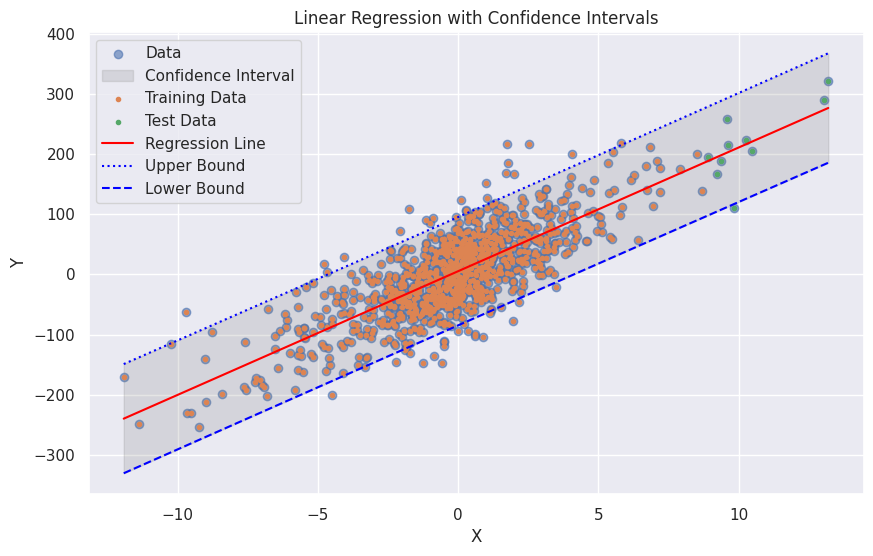

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t
from src.functions import calculate_residual_variance, calculate_prediction_intervals


def plot_regression_with_intervals(
    x, y, x_train, y_train, x_test, y_test, x_full, y_pred, y_pred_lower, y_pred_upper
):
    """Plot regression line with confidence intervals."""
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label="Data", alpha=0.6)
    plt.fill_between(
        x_full,
        y_pred_lower,
        y_pred_upper,
        color="gray",
        alpha=0.2,
        label="Confidence Interval",
    )
    plt.scatter(x_train, y_train, marker=".", label="Training Data")
    plt.scatter(x_test, y_test, marker=".", label="Test Data")
    plt.plot(x_full, y_pred, color="red", label="Regression Line")
    plt.plot(
        x_full, y_pred_upper, linestyle="dotted", color="blue", label="Upper Bound"
    )
    plt.plot(x_full, y_pred_lower, linestyle="--", color="blue", label="Lower Bound")

    # Add labels and legend
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Linear Regression with Confidence Intervals")
    plt.legend()
    plt.show()


# Set Seaborn style
sns.set()

# Load and sort data
data = np.loadtxt("../data/set_2/dane1.txt")
data = data[np.argsort(data[:, 0])]

# Split data into independent (x) and dependent (y) variables
x = data[:, 0]
y = data[:, 1]
n = len(data)

# Define subsets of data
x_train = x[:990]
y_train = y[:990]
n_train = len(x_train)

x_test = x[-10:]
y_test = y[-10:]
n_test = len(x_test)

# Use the full dataset for predictions
x_full = x
y_full = y
n_full = len(x_full)

# Significance level
alpha = 0.05


# Calculate regression coefficients
b0, b1 = estimate_coefficients(x_train, y_train)

# Calculate residual variance
residual_variance = calculate_residual_variance(x_train, y_train, b0, b1, n_train)

# Calculate prediction intervals
y_pred, y_pred_lower, y_pred_upper = calculate_prediction_intervals(
    x_full, x_train, b0, b1, residual_variance, t_critical
)

# Plot regression with confidence intervals
plot_regression_with_intervals(
    x, y, x_train, y_train, x_test, y_test, x_full, y_pred, y_pred_lower, y_pred_upper
)